In [6]:
import requests
import json
import pandas as pd

# Eine schnell Einführung zur Abfragung von "TheGraph Explorer" mit Python

Um einen Subgraphen abzufragen, müssen Sie mit den "Graph Explorer" eine Abfrage generieren, die Sie verwenden möchten, und die API unter "Queries(HTTP)" kopieren.

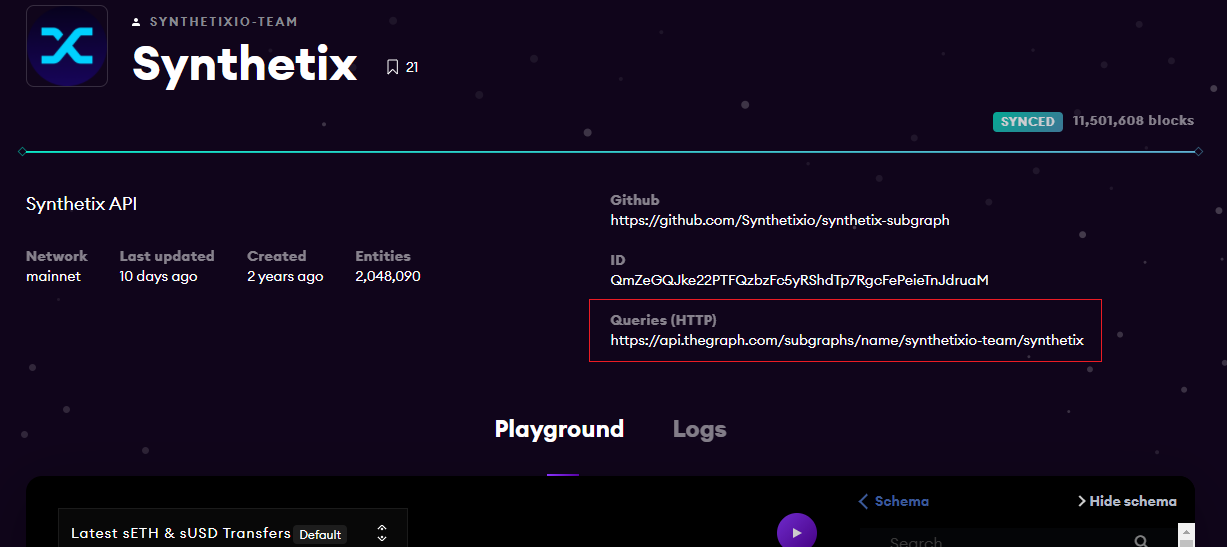

Auf der rechten Seite können Sie auf die Entitätsnamen klicken und die zur Abfrage verfügbaren Elemente sehen. Die Abfrage wird in schema.graphql geschrieben. Auf der linken Seite finden Sie eine Auswahlliste mit vorgefertigten Vorlagen.

Nachdem Sie die Abfrage mit den Feldern für Sie interessanten Feldern aktualisiert haben, führen Sie den Explorer über den lila Schaltknopf aus.

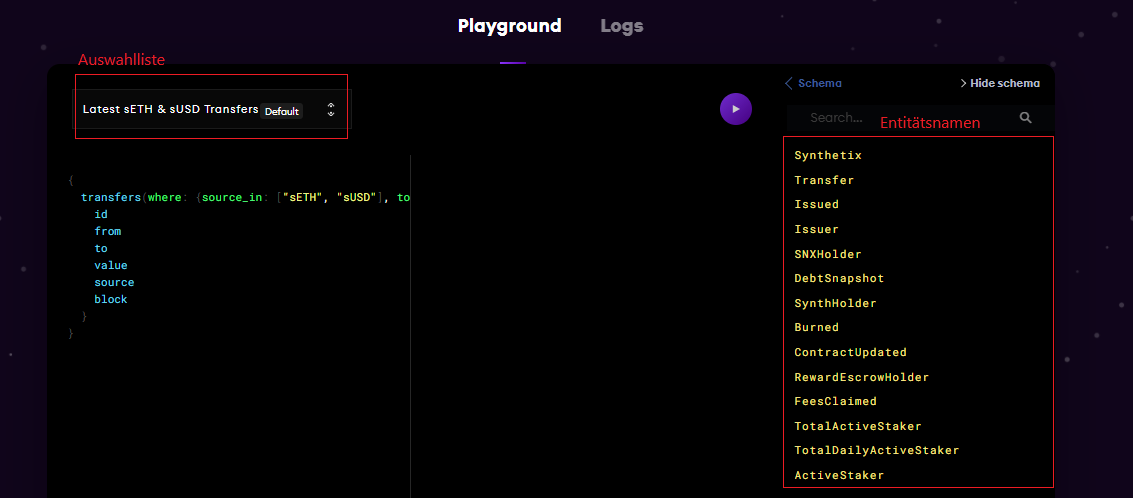 

Source: https://towardsdatascience.com/connecting-to-a-graphql-api-using-python-246dda927840

# Nun zur Python Console

In [2]:
#kopieren Sie die Subgraph URL von dem Graph Explorer
subgraph_url = "https://api.thegraph.com/subgraphs/name/synthetixio-team/synthetix"

#kopieren Sie die Abfrage ("Query") von dem Graph Explorer
query = """{
  snxholders(orderBy: balanceOf, orderDirection: desc) {
    id
    balanceOf
    collateral
    transferable
    initialDebtOwnership
    debtEntryAtIndex
    block
  }
}
"""


In [7]:
#definieren Sie eine Function

def get_query(subgraph_url, query, variables=None): 
    request_json = {'query': query}
    if variables:
        request_json['variables'] = variables
    resp = requests.post(subgraph_url, json=request_json)
    data = json.loads(resp.text)
    return data['data']

In [14]:
### convert the data into a pandas dataframe
df = pd.DataFrame(data.get('snxholders', []))
df

,balanceOf,block,collateral,debtEntryAtIndex,id,initialDebtOwnership,transferable
0,23971129405815539499914571,11474659,35842906695037366378290603,2865034935571462707199525,0x49be88f0fcc3a8393a59d3688480d7d253c37d2a,254857595595022766457330872,0
1,8138924365001417767996282,11500827,10958022487390908870102719,2555289648339641455306191,0xd85a7a3c5f08e3e709c233e133ce1335fbbf5518,80353716103975384677160468,0
2,4000087062812333464246736,11497257,4017427581091787794544060,2592334260777753578221713,0x27cc4d6bc95b55a3a981bf1f1c7261cda7bb0931,29560460479829882154035376,0
3,3183798853320194746256075,11475054,13649850936456658236164862,2819522549867440549160748,0xa5f7a39e55d7878bc5bd754ee5d6bd7a7662355b,95664240788434410950691791,0
4,2617451218779469817733108,11478833,6578390681881100645037994,2671941601267783026639218,0xc8c2b727d864cc75199f5118f0943d2087fb543b,52132554038524732824982587,0
...,...,...,...,...,...,...,...
95,169622801594294611061360,11470001,245687636541161841852517,3107876117749576148754521,0x7e935fac4448102c16fa83abc01ac57d38123dca,1456646350995396164255259,0
96,169197597984432486250098,10909172,169197597984432486250098,1000000000000000000000000000,0x1e5ce6f088fd0adb4fcff31cfb02a61503311be9,0,169197597984432486250098
97,163218382719784780403129,11483551,186242193956356107651831,2620786145768891646555384,0xf88d3412764873872ab1fded5f168a6c1a3bf7bb,1417371725453484213198587,0
98,162640416490660262979209,11465570,210430515144654302732384,2888963038822428276872626,0x78b037b39704e88a82dd23cfbe1f57f6aef8ebc5,1265851193028057546327329,0


In [15]:
# Datentyp pruefen
df.dtypes

balanceOf               object
block                   object
collateral              object
debtEntryAtIndex        object
id                      object
initialDebtOwnership    object
transferable            object
dtype: object

In [17]:
# Datentyp ändern
df["balanceOf"] = df.balanceOf.astype(float)
df.dtypes

balanceOf               float64
block                    object
collateral               object
debtEntryAtIndex         object
id                       object
initialDebtOwnership     object
transferable             object
dtype: object

Referenzen: 
- https://github.com/tesaho/subgraphs/blob/main/python_subgraphs.ipynb
- https://towardsdatascience.com/connecting-to-a-graphql-api-using-python-246dda927840